# Assignment 2


#  Data pre-processing


In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [364]:
q1_data = pd.read_csv('2-1.csv')
q2_data = pd.read_csv('2-2.csv')

In [365]:
q1_data

,type,difficulty,learned\_before,completeness,class: proper\_question
0,math,hard,yes,poor,no
1,chemistry,hard,no,good,no
2,language,hard,yes,good,yes
3,language,medium,no,poor,yes
4,math,easy,yes,poor,yes
5,language,easy,no,good,no
6,chemistry,easy,yes,poor,yes
7,math,medium,no,poor,no
8,math,easy,yes,poor,yes
9,chemistry,medium,no,poor,yes


# **Q1 (a)**



In [366]:
# create a decision tree classifier using information gain, min_samples_split = 4, random_state = 1
clf = DecisionTreeClassifier(
    criterion = 'entropy',
    min_samples_split = 4,
    random_state = 1
)

In [367]:
# onehot encoding
enc = OneHotEncoder(
    handle_unknown = 'ignore',
    drop = "if_binary"
)
enc.fit(q1_data)
q1_data = enc.transform(q1_data).toarray()
q1_data = pd.DataFrame(q1_data)
q1_data.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [396]:
enc.get_feature_names_out()

array(['type_chemistry', 'type_language', 'type_math', 'difficulty_easy',
       'difficulty_hard', 'difficulty_medium', 'learned\\_before_yes',
       'completeness_poor', 'class: proper\\_question_yes'], dtype=object)

In [368]:
# separate X and Y
X = q1_data.iloc[:, 0:8]
Y = q1_data.iloc[:, 8]

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [369]:
# fit the model
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=1)

In [370]:
# calculate the training and testing accuracy
print('Training Accuracy: ', accuracy_score(Y_train, clf.predict(X_train)))
print('Testing Accuracy: ', accuracy_score(Y_test, clf.predict(X_test)))

Training Accuracy:  0.7
Testing Accuracy:  0.5


c:\Users\fongc\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


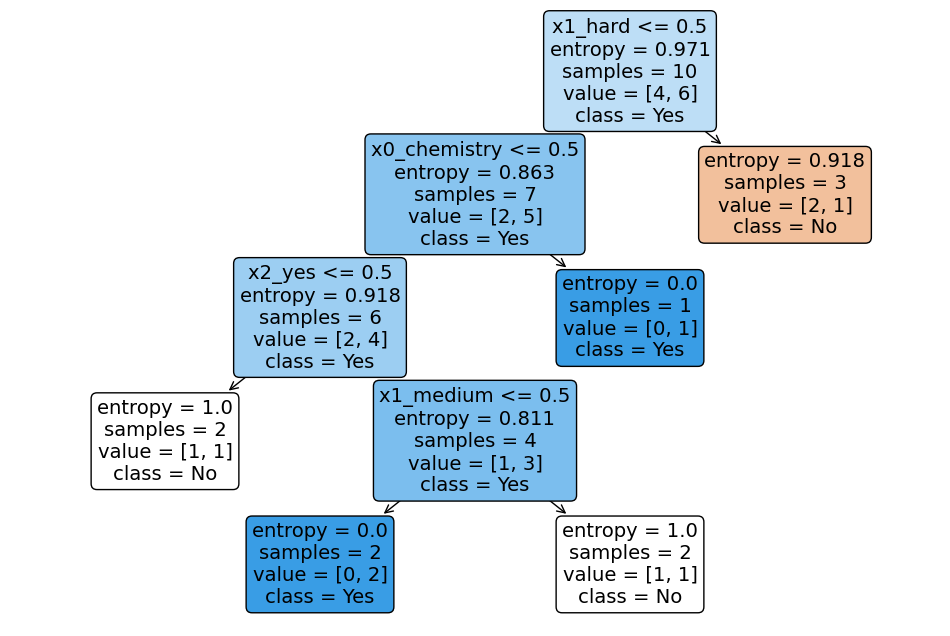

In [374]:
plt.figure(figsize = (12, 8))
plot_tree(clf, filled = True, rounded = True, feature_names = enc.get_feature_names(), class_names = ['No', 'Yes'])
plt.show()

# **Q1 (b)**


In [375]:
# vary `min_test_split` from 2 to 9 and plot the training and testing accuracy
train_acc = []
test_acc = []
for i in range(2, 10):
    clf = DecisionTreeClassifier(
        criterion = 'entropy',
        min_samples_split = i,
        random_state = 1
    )
    clf.fit(X_train, Y_train)
    train_acc.append(accuracy_score(Y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(Y_test, clf.predict(X_test)))

print(train_acc)
print(test_acc)

[1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


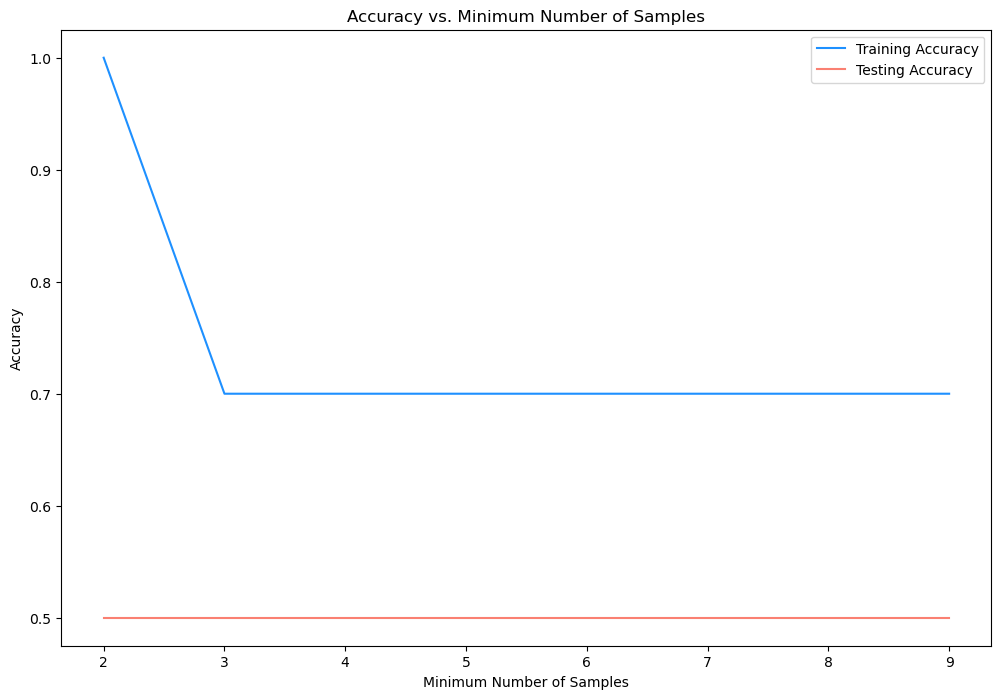

In [376]:
# plot the training and testing accuracy
plt.figure(figsize = (12, 8))
plt.plot(range(2, 10), train_acc, label = 'Training Accuracy', c = "dodgerblue")
plt.plot(range(2, 10), test_acc, label = 'Testing Accuracy', c = "salmon")
plt.title("Accuracy vs. Minimum Number of Samples")
plt.xlabel("Minimum Number of Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Q1 (c)**

In [ ]:
# repeat for Gini index


# **Q1 (d)**

# **Q1 (e)**

# **Q1 (f)**

# **Q2 (a)**

In [377]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [378]:
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(q2_data['text'], q2_data['sentiment'], random_state=1)

# **Q2 (b)**